###Membres du groupe 
- Nemlin Constant Jean Eudes 
-Coulibaly pekanry
-Yao yao cyrille 
-kessie armande christelle 

In [ ]:
#importation 
import os
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [3]:
#connexion a jumia
options = Options()
driver = webdriver.Firefox(options=options)


In [19]:
def scrapper_jumia(driver, nom_article_scraper):
    """
    Fonction pour scraper Jumia.
    Prend en paramètre le nom du produit et retourne un DataFrame contenant les données.
    """
    # Dictionnaire pour stocker les données scrappées
    data = {
        "Nom_Article": [],
        "Prix_Article": [],
        "Lien": [],
    }

    # URL de la page Jumia
    base_url = "https://www.jumia.ci/"
    driver.get(base_url)
    while driver.execute_script("return document.readyState") != "complete":
        pass

    # Localisation et interaction avec la barre de recherche
    try:
        search_bar = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "fi-q"))
        )
        search_bar.clear()
        search_bar.send_keys(nom_article_scraper)
        search_bar.send_keys(Keys.ENTER)
    except Exception as e:
        print(f"Erreur lors de l'accès à la barre de recherche : {e}")
        return pd.DataFrame(data)

    # Boucle pour parcourir les pages
    while True:
        # Attendre que les articles soient chargés
        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "prd._fb.col.c-prd"))
            )
        except Exception as e:
            print(f"Erreur lors du chargement des articles : {e}")
            break

        # Analyse de la page avec BeautifulSoup
        page = driver.page_source
        soup = BeautifulSoup(page, "html.parser")

        # Extraction des articles
        article_elements = soup.find_all("article", class_="prd _fb col c-prd")
        for article in article_elements:
            try:
                name = article.find("h3", class_="name").text.strip().lower()
                price_text = article.find("div", class_="prc").text
                price = float(price_text.replace("FCFA", "").replace(",", "").strip())
                link = base_url + article.find("a", href=True)["href"]
                data["Nom_Article"].append(name)
                data["Prix_Article"].append(price)
                data["Lien"].append(link)
            except Exception as e:
                continue

        # Pagination - Aller à la page suivante si disponible
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, "a.pg[aria-label='Page suivante']")
            next_page_url = next_button.get_attribute("href")
            driver.get(next_page_url)
            time.sleep(2)  # Laisser du temps pour charger la page suivante
        except Exception:
            print("Fin de la pagination.")
            break

    # Retourner les données sous forme de DataFrame
    return pd.DataFrame(data)


In [6]:
def scrapper_kevajo(driver, nom_article_scraper):
    """
    Fonction pour scraper Kevajo.
    Prend en paramètre le driver Selenium et le nom du produit, et retourne un DataFrame contenant les données.
    """

    # Dictionnaire pour stocker les données scrappées
    data = {
        "Nom_Article": [],
        "Prix_Article": [],
        "Lien": [],
    }

    # URL de la page Kevajo
    base_url = "https://kevajo.com/"
    driver.get(base_url)

    # Assurer que la page est complètement chargée
    while driver.execute_script("return document.readyState") != "complete":
        pass

    try:
        # Rechercher la barre de recherche et entrer le produit
        search_bar = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'input[placeholder="Cherchez un produit"]'))
        )
        search_bar.clear()
        search_bar.send_keys(nom_article_scraper)
        search_bar.send_keys(Keys.ENTER)
        time.sleep(5)  # Attendre le chargement des résultats
    except Exception as e:
        print(f"Erreur lors de l'accès à la barre de recherche : {e}")
        return pd.DataFrame(data)

    # Boucle pour parcourir les pages
    while True:
        try:
            # Attendre que les articles soient chargés
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div[data-source='main_loop']"))
            )

            # Obtenir le code source de la page
            page = driver.page_source
            soup = BeautifulSoup(page, "html.parser")

            # Trouver tous les articles dans la section 'main_loop'
            article_elements = soup.find_all("div", {"data-loop": True})
            for article in article_elements:
                try:
                    name = article.find("h3", {"class": "wd-entities-title"}).text.strip()
                    price_text = article.find("bdi").text
                    price = float(price_text.replace("CFA", "").replace(",", "").strip())
                    link = article.find("h3", {"class": "wd-entities-title"}).find("a", href=True)["href"]
                    
                    # Ajouter les données extraites
                    data["Nom_Article"].append(name)
                    data["Prix_Article"].append(price)
                    data["Lien"].append(link)
                except AttributeError as e:
                    continue

        except Exception as e:
            print(f"Erreur lors du chargement des articles : {e}")
            break

        # Pagination - Aller à la page suivante si disponible
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, "a.next.page-numbers")
            next_page_url = next_button.get_attribute("href")
            driver.get(next_page_url)
            time.sleep(2)  # Laisser du temps pour charger la page suivante
        except Exception:
            print("Fin de la pagination ou bouton 'Next' non trouvé.")
            break

    return pd.DataFrame(data)

In [7]:
def scrapper_djokstore(driver, nom_article_scraper):
    """
    Fonction pour scraper Kevajo.
    Prend en paramètre le driver Selenium et le nom du produit, et retourne un DataFrame contenant les données.
    """

    # Dictionnaire pour stocker les données scrappées
    data = {
        "Nom_Article": [],
        "Prix_Article": [],
        "Lien": [],
    }

    # URL de la page Kevajo
    base_url = "https://djokstore.ci/"
    driver.get(base_url)

    # Assurer que la page est complètement chargée
    while driver.execute_script("return document.readyState") != "complete":
        pass

    try:
        # Rechercher la barre de recherche et entrer le produit
        search_bar = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, '.header-search .search_header input.search_header__input:not([type=submit]):not([type=checkbox])'))
        )
        search_bar.clear()
        search_bar.send_keys(nom_article_scraper)
        search_bar.send_keys(Keys.ENTER)
        time.sleep(5)  # Attendre le chargement des résultats
    except Exception as e:
        print(f"Erreur lors de l'accès à la barre de recherche : {e}")
        return pd.DataFrame(data)

    # Boucle pour parcourir les pages
    while True:
        try:
            # Attendre que les articles soient chargés
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "#product-grid"))
            )

            # Obtenir le code source de la page
            page = driver.page_source
            soup = BeautifulSoup(page, "html.parser")

            # Trouver tous les articles dans la section 'main_loop'
            article_elements = soup.select(".product-collection")
            for article in article_elements:
                try:
                    name = article.select_one("h2").text.strip()
                    price_text = article.select_one(".current").text
                    price = float(price_text.replace("FCFA", "").replace(",", "").strip())
                    link = "https"+article.select_one(".d-block.image_product.cursor-default.ratio")["href"]
                    
                    # Ajouter les données extraites
                    data["Nom_Article"].append(name)
                    data["Prix_Article"].append(price)
                    data["Lien"].append(link)
                except AttributeError as e:
                    continue
        except Exception as e:
            print(f"Erreur lors du chargement des articles : {e}")
            break

        # Pagination - Aller à la page suivante si disponible
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, ".page-next.pagination__item.pagination__item--prev.pagination__item-arrow.link.motion-reduce")
            next_page_url = next_button.get_attribute("href")
            driver.get(next_page_url)
            time.sleep(2)  # Laisser du temps pour charger la page suivante
        except Exception:
            print("Fin de la pagination ou bouton 'Next' non trouvé.")
            break

    return pd.DataFrame(data)

In [8]:
def scraper_les_produits(liste_produis,site):
    # DataFrame pour stocker toutes les données
    resultats_totaux = pd.DataFrame()
    # Boucle pour scrapper les données de chaque marque
    for marque in marques:
        print(f"Scraping des articles pour la marque : {marque}")
        try:
            data_marque = pd.DataFrame()
            # Appeler la fonction scrapper_jumia
            if site == "jumia":
                data_marque = scrapper_jumia(driver, marque)
                # Ajouter une colonne pour indiquer la marque
            elif site == "kevajo" :
                data_marque = scrapper_kevajo(driver, marque)
            elif site == "djokstore":
                data_marque = scrapper_djokstore(driver, marque)
            data_marque["Marque"] = marque
            # Ajouter les résultats au DataFrame total
            resultats_totaux = pd.concat([resultats_totaux, data_marque], ignore_index=True)
        except Exception as e:
            print(f"Erreur lors du scraping pour {marque} : {e}")
    return resultats_totaux

In [9]:
marques = ["Samsung","iphone","Xiaomi","huawei","tecno"]

In [16]:
data_jumia= scraper_les_produits(marques,'jumia')


Scraping les articles pour la marque : Samsung
Fin de la pagination.
Scraping les articles pour la marque : iphone
Fin de la pagination.
Scraping les articles pour la marque : Xiaomi
Fin de la pagination.
Scraping les articles pour la marque : huawei
Fin de la pagination.
Scraping les articles pour la marque : tecno
Fin de la pagination.


In [17]:
data_kevajo = scraper_les_produits(marques,'kevajo')


Scraping les articles pour la marque : Samsung
Fin de la pagination ou bouton 'Next' non trouvé.
Scraping les articles pour la marque : iphone
Fin de la pagination ou bouton 'Next' non trouvé.
Scraping les articles pour la marque : Xiaomi
Fin de la pagination ou bouton 'Next' non trouvé.
Scraping les articles pour la marque : huawei
Fin de la pagination ou bouton 'Next' non trouvé.
Scraping les articles pour la marque : tecno
Fin de la pagination ou bouton 'Next' non trouvé.


In [18]:
data_djokstore = scraper_les_produits(marques,'djokstore')


Scraping les articles pour la marque : Samsung
Fin de la pagination ou bouton 'Next' non trouvé.
Scraping les articles pour la marque : iphone
Erreur lors du chargement des articles : Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:511:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Scraping les articles pour la marque : Xiaomi
Erreur lors du chargement des articles : 'NoneType' object is not subscriptable
Scraping les articles pour la marque : huawei
Fin de la pagination ou bouton 'Next' non trouvé.
Scraping les articles pour la marque : tecno
Fin de la pagination ou bouton 'Next' non trouvé.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
data_jumia['Site'] = 'Jumia CI'
data_jumia

,Nom_Article,Prix_Article,Lien,Marque,Site
0,samsung tv led 32 pouces hd serie 4 - ua32j400...,96400.0,https://www.jumia.ci//customer/account/login/?...,Samsung,Jumia CI
1,"samsung galaxy a05 - 6.7"" - ram 4/64go - 5000m...",53000.0,https://www.jumia.ci//customer/account/login/?...,Samsung,Jumia CI
2,"samsung galaxy a05 - 6.7"" - ram 4/64go - 5000m...",53000.0,https://www.jumia.ci//customer/account/login/?...,Samsung,Jumia CI
3,samsung galaxy a15 4g ram 4go - rom 128go - b...,100000.0,https://www.jumia.ci//customer/account/login/?...,Samsung,Jumia CI
4,"samsung smart tv led 43"" full hd - ua43t5300au...",198500.0,https://www.jumia.ci//customer/account/login/?...,Samsung,Jumia CI
...,...,...,...,...,...
10438,"tecno t313 - 1.77""- 4mb ram+ 4mb rom - dual si...",12489.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI
10439,tecno pop 6 go 4g - 6'' hd+ - 4g - 2/32go - 5m...,68500.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI
10440,"tecno t313 - 2,8"" - dual sim- 1500mah - noir",12900.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI
10441,tecno t313 - 2.4 pouces - 2 mpx - 1.2 mo - dua...,13200.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI


In [34]:
data_djokstore['Site'] = 'djokstore'
data_djokstore

,Nom_Article,Prix_Article,Lien,Marque,Site
0,"Samsung Galaxy M13-4/64GB-50Mpx- 5000mAh - 6,6''",112500.0,https/products/copie-de-samsung-galaxy-m13-4-6...,Samsung,djokstore
1,"Samsung Galaxy S24 -6.2""-8/256 Go- 5G - Noir",599900.0,https/products/samsung-galaxy-s24-6-2-8-256-go...,Samsung,djokstore
2,Samsung GALAXY TAB A7 Lite - 8.7''- 8mpx- 3/32...,94900.0,https/products/samsung-galaxy-tab-a7-lite-8-7-...,Samsung,djokstore
3,SAMSUNG Z FOLD 4 256GB,840000.0,https/products/samsung-z-fold-4-256gb?_pos=4&_...,Samsung,djokstore
4,"Samsung Galaxy S24 -6.2""-12/256Go- 5G - Noir",649900.0,https/products/samsung-galaxy-s24-6-2-8-128-go...,Samsung,djokstore
...,...,...,...,...,...
156,Tecno PHANTOM 9 – 128Go/6Go RAM–3500mAh – Bleu,150900.0,https/products/tecno-phantom-9-128go-6go-ram-3...,tecno,djokstore
157,Tecno Pop 6 Go - 6'' HD+ - 1/16Go - 3G - 5Mpx ...,54900.0,https/products/copie-de-tecno-pop-6-go-6-hd-1-...,tecno,djokstore
158,"Tecno Spark 5 Pro - 2 SIM - 4G - 6,6"" - 3Go - ...",69900.0,https/products/tecno-spark-5-pro-2-sim-4g-6-6-...,tecno,djokstore
159,Tecno Pop 6 Go - 6'' HD+ - 2/32Go - 4G - 5Mpx ...,64900.0,https/products/tecno-pop-6-go-6-hd-2-32go-4g-5...,tecno,djokstore


In [35]:
data_kevajo['Site'] = 'kevajo'
data_kevajo

,Nom_Article,Prix_Article,Lien,Marque,Site
0,Powerbank solaire 40000Mah d’origine rapide po...,25000.0,https://kevajo.com/boutique/telephones-et-tabl...,Samsung,kevajo
1,Chargeur adaptateur type C 45W compatible Sams...,6800.0,https://kevajo.com/boutique/telephones-et-tabl...,Samsung,kevajo
2,Chargeur Samsung Super Rapide – Noir,9000.0,https://kevajo.com/boutique/telephones-et-tabl...,Samsung,kevajo
3,Chargeur Samsung Charge Turbo – Noir,25000.0,https://kevajo.com/boutique/telephones-et-tabl...,Samsung,kevajo
4,Télécommande Adapté Samsung Noir,12000.0,https://kevajo.com/boutique/tv-audio-video/tel...,Samsung,kevajo
...,...,...,...,...,...
577,Smart Tecnology TV LED HD 32″ – Régulateur & D...,64000.0,https://kevajo.com/boutique/electronique/tv/tv...,tecno,kevajo
578,Etui à Rabat Compatible Tecno Pova Neo – Noir,10000.0,https://kevajo.com/boutique/telephones-et-tabl...,tecno,kevajo
579,Etui à Rabat Compatible Tecno Pova Neo – Bleu,10000.0,https://kevajo.com/boutique/telephones-et-tabl...,tecno,kevajo
580,Chargeurs Rapide Très Puissant – Tecno,5000.0,https://kevajo.com/boutique/telephones-et-tabl...,tecno,kevajo


In [36]:
df = pd.concat([data_jumia, data_djokstore,data_kevajo], ignore_index=True)

In [37]:
df.shape

(11186, 5)

In [38]:
#adfficher les doublons
df[df.duplicated()]

,Nom_Article,Prix_Article,Lien,Marque,Site
99,casque samsung i 12 - casque bluetooth sans fi...,4900.0,https://www.jumia.ci//generic-casque-samsung-i...,Samsung,Jumia CI
181,samsung tv led - samsung ua43 - led full hd - ...,195000.0,https://www.jumia.ci//tv-led-samsung-ua43-led-...,Samsung,Jumia CI
261,samsung télévision android grand écran 65 pouces,517800.0,https://www.jumia.ci//samsung-television-andro...,Samsung,Jumia CI
996,samsung gt-e1207z / gt-e1207y / gt-e1205y- 2 ...,13950.0,https://www.jumia.ci//samsung-gt-e1207z-gt-e12...,Samsung,Jumia CI
997,samsung galaxy a04e 3ram/32go noir garantie 1...,58500.0,https://www.jumia.ci//samsung-galaxy-a04e-3ram...,Samsung,Jumia CI
...,...,...,...,...,...
9201,tecno coque en silicone compatible tecno camon...,5500.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI
9202,"tecno spark 10 pro - 6,6'' hd+ - 4g - 2sim - 3...",102000.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI
9203,tecno t402 - 3 puces - radio fm - camera -1500...,16600.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI
9204,"tecno pop 6 - 4g - 6,1 pouces - 2go ram - 32go...",63000.0,https://www.jumia.ci//customer/account/login/?...,tecno,Jumia CI


In [39]:
df.dtypes

Nom_Article      object
Prix_Article    float64
Lien             object
Marque           object
Site             object
dtype: object

### ANALYSE COMPARATIVE DES PRIX

In [40]:
# Récupérer les données qui ne concernet ques les téléphones
df_telephones = df[df['Nom_Article'].str.contains('GB|gb|pouces|Go', case=False, na=False)]
df_telephones
df_telephones.shape

(3052, 5)

In [41]:
# Standardiser les noms des marques
def standardiser_marques(marque):
    marque = marque.lower()  # Insensible à la casse
    if "tecno" in marque:
        return "Tecno"
    elif "samsung" in marque:
        return "Samsung"
    elif "xiaomi" in marque:
        return "Xiaomi"
    elif "huawei" in marque:
        return "Huawei"
    elif "iphone" in marque or "apple" in marque:
        return "Apple iPhone"
    else:
        return marque.capitalize()

# Appliquer la standardisation des marques
df_telephones['Marque'] = df_telephones['Marque'].apply(standardiser_marques)

# Réaliser l'analyse pour chaque marque regroupée
marques_standardisées = df_telephones['Marque'].unique()
for marque in marques_standardisées:
    # Filtrer les données pour chaque marque standardisée
    df_marque = df_telephones[df_telephones['Marque'] == marque]
    
    prix_min = df_marque['Prix_Article'].min()
    prix_max = df_marque['Prix_Article'].max()
    prix_moyen = df_marque['Prix_Article'].mean()
    prix_mediane = df_marque['Prix_Article'].median()
    ecart_type = df_marque['Prix_Article'].std()

    # Affichage des résultats pour chaque marque standardisée
    print(f"\nAnalyse des prix pour la marque {marque} :")
    print(f"Prix minimum : {prix_min} FCFA")
    print(f"Prix maximum : {prix_max} FCFA")
    print(f"Prix moyen : {prix_moyen:.2f} FCFA")
    print(f"Prix médian : {prix_mediane} FCFA")
    print(f"Écart-type des prix : {ecart_type:.2f} FCFA")



Analyse des prix pour la marque Samsung :
Prix minimum : 2700.0 FCFA
Prix maximum : 1276600.0 FCFA
Prix moyen : 165349.81 FCFA
Prix médian : 135000.0 FCFA
Écart-type des prix : 132882.03 FCFA

Analyse des prix pour la marque Apple iPhone :
Prix minimum : 3000.0 FCFA
Prix maximum : 1220000.0 FCFA
Prix moyen : 459688.39 FCFA
Prix médian : 419000.0 FCFA
Écart-type des prix : 332440.95 FCFA

Analyse des prix pour la marque Xiaomi :
Prix minimum : 2500.0 FCFA
Prix maximum : 1000000.0 FCFA
Prix moyen : 100978.29 FCFA
Prix médian : 81250.0 FCFA
Écart-type des prix : 77793.62 FCFA

Analyse des prix pour la marque Huawei :
Prix minimum : 2500.0 FCFA
Prix maximum : 708000.0 FCFA
Prix moyen : 184375.72 FCFA
Prix médian : 197995.0 FCFA
Écart-type des prix : 121955.82 FCFA

Analyse des prix pour la marque Tecno :
Prix minimum : 3000.0 FCFA
Prix maximum : 3850000.0 FCFA
Prix moyen : 79061.42 FCFA
Prix médian : 64000.0 FCFA
Écart-type des prix : 134784.72 FCFA


C:\Users\papid\AppData\Local\Temp\ipykernel_11784\3328808132.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telephones['Marque'] = df_telephones['Marque'].apply(standardiser_marques)


C:\Users\papid\AppData\Local\Temp\ipykernel_11784\1437235516.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Site")
C:\Users\papid\AppData\Local\Temp\ipykernel_11784\1437235516.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Site")
C:\Users\papid\AppData\Local\Temp\ipykernel_11784\1437235516.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Site")


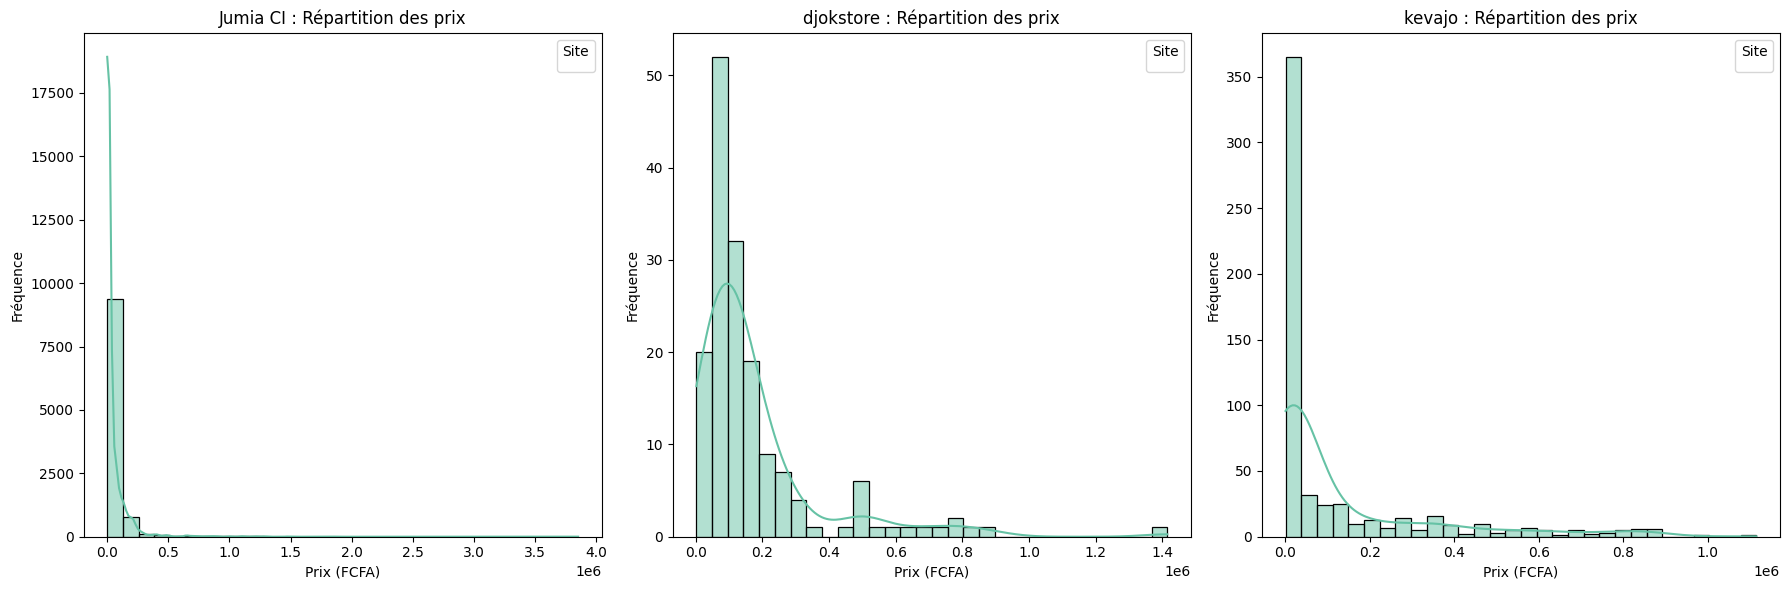

In [42]:
dataframes = [data_jumia, data_djokstore, data_kevajo]

# Liste des noms des DataFrames pour ajouter dans le titre des graphiques
df_names = ['Jumia CI', 'djokstore', 'kevajo']


# Créer une figure pour afficher tous les plots
plt.figure(figsize=(18, 6))

# Itérer sur chaque DataFrame
for i, (df, name) in enumerate(zip(dataframes, df_names), start=1):
    plt.subplot(1, len(dataframes), i)  # Créer un subplot pour chaque DataFrame
    
    sns.histplot(data=df, x='Prix_Article', hue='Site', multiple='stack', kde=True, palette="Set2", bins=30)
    
    plt.title(f"{name} : Répartition des prix")
    plt.xlabel("Prix (FCFA)")
    plt.ylabel("Fréquence")
    plt.legend(title="Site")

plt.tight_layout()  # Ajuste l'espacement entre les sous-graphiques
plt.show()

- Portable Samsung
Prix minimum (50,500 FCFA) et maximum (1,210,000 FCFA) : Samsung propose une large gamme de produits, allant des modèles économiques aux modèles haut de gamme.
Prix moyen (163,555.92 FCFA) et médian (139,900 FCFA) : Les produits Samsung semblent se concentrer principalement dans la gamme moyenne à abordable.
Écart-type (116,882.47 FCFA) : Indique une certaine variabilité, mais relativement moins prononcée comparée à d'autres marques comme Tecno ou Apple.
Conclusion : Samsung se positionne sur une large part du marché, avec une majorité de produits dans la gamme moyenne.

- Apple iPhone
Prix minimum (44,900 FCFA) et maximum (1,220,000 FCFA) : La fourchette de prix est large, mais le bas de gamme est probablement constitué d'appareils reconditionnés ou anciens modèles.
Prix moyen (514,537.32 FCFA) et médian (472,450 FCFA) : Les iPhones se positionnent clairement dans la gamme premium, avec une clientèle ciblée recherchant des produits haut de gamme.
Écart-type (286,755.17 FCFA) : Une variabilité très élevée, reflétant les différences entre modèles reconditionnés, anciens et récents.
Conclusion : Apple domine le segment premium, avec des prix majoritairement élevés mais accessibles pour les anciens modèles.

- Portable Xiaomi
Prix minimum (50,100 FCFA) et maximum (699,000 FCFA) : Xiaomi offre des options majoritairement économiques à moyenne gamme.
Prix moyen (111,980.73 FCFA) et médian (88,000 FCFA) : Les produits sont clairement orientés vers les segments abordables.
Écart-type (69,634.70 FCFA) : Une faible variabilité, montrant que Xiaomi reste cohérent dans sa gamme de prix.
Conclusion : Xiaomi est compétitif sur le marché des téléphones abordables, ciblant les consommateurs soucieux de leur budget.

- Portable Techno
Prix minimum (50,100 FCFA) et maximum (699,000 FCFA) : Xiaomi offre des options majoritairement économiques à moyenne gamme.
Prix moyen (111,980.73 FCFA) et médian (88,000 FCFA) : Les produits sont clairement orientés vers les segments abordables.
Écart-type (69,634.70 FCFA) : Une faible variabilité, montrant que Xiaomi reste cohérent dans sa gamme de prix.
Conclusion : Xiaomi est compétitif sur le marché des téléphones abordables, ciblant les consommateurs soucieux de leur budget.

- Portable Huawei
Prix minimum (50,899 FCFA) et maximum (708,000 FCFA) : Huawei couvre les segments entrée à moyenne gamme, avec quelques modèles plus avancés.
Prix moyen (187,625.73 FCFA) et médian (160,000 FCFA) : Les prix moyens et médians montrent un positionnement légèrement supérieur à Samsung.
Écart-type (137,388.54 FCFA): Une variabilité notable, mais pas aussi élevée que celle de Tecno ou Apple.
Conclusion : Huawei semble cibler un segment légèrement plus haut que Xiaomi ou Tecno, tout en restant accessible



In [43]:
min_price_links = df_telephones.loc[df_telephones.groupby('Marque')['Prix_Article'].idxmin()][['Marque', 'Lien','Site', 'Prix_Article','Nom_Article']]
max_price_links = df_telephones.loc[df_telephones.groupby('Marque')['Prix_Article'].idxmax()][['Marque', 'Lien', 'Site','Prix_Article','Nom_Article']]
price_comparison = pd.merge(min_price_links, max_price_links, on='Marque', suffixes=('_min', '_max'))

In [44]:
price_comparison

,Marque,Lien_min,Site_min,Prix_Article_min,Nom_Article_min,Lien_max,Site_max,Prix_Article_max,Nom_Article_max
0,Apple iPhone,https://www.jumia.ci//customer/account/login/?...,Jumia CI,3000.0,ego support universel tablette / smartphone te...,https://www.jumia.ci//customer/account/login/?...,Jumia CI,1220000.0,apple iphone 16 pro max ( 512 go) - titane nat...
1,Huawei,https://www.jumia.ci//customer/account/login/?...,Jumia CI,2500.0,"antichoc compatible huawei nova 8i 6.67"" pouce...",https://kevajo.com/boutique/informatique/ordin...,kevajo,708000.0,HUAWEI MateStation S 23.8″ AMD Ryzen 5 8 Go RA...
2,Samsung,https://www.jumia.ci//customer/account/login/?...,Jumia CI,2700.0,samsung antichoc compatible samsung galaxy a54...,https://www.jumia.ci//customer/account/login/?...,Jumia CI,1276600.0,"samsung galaxy z fold 6 - 7.6"" - 12/512 go - 5..."
3,Tecno,https://www.jumia.ci//customer/account/login/?...,Jumia CI,3000.0,tecno antichoc compatible tecno spark 9/9t - 6...,https://www.jumia.ci//tecno-camon-30-premier-5...,Jumia CI,3850000.0,tecno camon 30 premier 5g 16gb ram - 512gb
4,Xiaomi,https://www.jumia.ci//customer/account/login/?...,Jumia CI,2500.0,antichoc compatible xiaomi redmi note 11 5g 6....,https://www.jumia.ci//customer/account/login/?...,Jumia CI,1000000.0,xiaomi mi curved gaming monitor 34pouces


- Diversité des prix : Les cinq marques étudiées montrent une grande diversité de prix, allant de modèles très abordables à des produits extrêmement coûteux. Samsung et Apple ont des modèles très chers, tandis que Tecno et Xiaomi se concentrent davantage sur des prix compétitifs pour les modèles économiques.
- Stratégie de prix : Apple et Samsung semblent privilégier des modèles haut de gamme à des prix très élevés, tandis que Huawei, Xiaomi et Tecno cherchent à offrir des alternatives moins chères.
- Sites de vente : Jumia CI apparaît comme une plateforme clé pour la vente de modèles haut de gamme (notamment pour Apple et Samsung). D'autres sites comme djokstore proposent des modèles plus abordables, en particulier pour les marques comme Tecno et Xiaomi.